In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
#visualisation options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
#import csv file into df
df = pd.read_csv('drive/MyDrive/empatheticPersonas.csv', encoding="latin1")

In [ ]:
df.head()

,Sex,Age,Sad - Patient response 1,Sad - Patient response 2,Sad - Patient response 3,Sad - Was this caused by a specific event/s?,Sad - Was this caused by a recent or distant event (or events)?,Sad - Have you recently attempted protocol 6 and found this reignited unmanageable emotions as a result of old events?,Sad - Have you recently attempted protocol 11 and found this reignited unmanageable emotions as a result of old events?,Sad - Thank you. Now I will ask some questions to understand your situation.,Sad - Have you strongly felt or expressed any of the following emotions towards someone:,Sad - Do you believe that you should be the saviour of someone else?,"Sad - Do you see yourself as the victim, blaming someone else for how negative you feel?",Sad - Do you feel that you are trying to control someone?,Sad - Are you always blaming and accusing yourself for when something goes wrong?,"Sad - In previous conversations, have you considered other viewpoints presented?",Sad - Are you undergoing a personal crisis (experiencing difficulties with loved ones e.g. falling out with friends)?,Angry - Patient response 1,Angry - Patient response 2,Angry - Patient response 3,Angry - Was this caused by a specific event/s?,Angry - Was this caused by a recent or distant event (or events)?,Angry - Have you recently attempted protocol 6 and found this reignited unmanageable emotions as a result of old events?,Angry - Have you recently attempted protocol 11 and found this reignited unmanageable emotions as a result of old events?,Angry - Thank you. Now I will ask some questions to understand your situation.,Angry - Have you strongly felt or expressed any of the following emotions towards someone:,Angry - Do you believe that you should be the saviour of someone else?,"Angry - Do you see yourself as the victim, blaming someone else for how negative you feel?",Angry - Do you feel that you are trying to control someone?,Angry - Are you always blaming and accusing yourself for when something goes wrong?,"Angry - In previous conversations, have you considered other viewpoints presented?",Angry - Are you undergoing a personal crisis (experiencing difficulties with loved ones e.g. falling out with friends)?,Anxious - Patient response 1,Anxious - Patient response 2,Anxious - Patient response 3,Anxious - Was this caused by a specific event/s?,Anxious - Was this caused by a recent or distant event (or events)?,Anxious - Have you recently attempted protocol 6 and found this reignited unmanageable emotions as a result of old events?,Anxious - Have you recently attempted protocol 11 and found this reignited unmanageable emotions as a result of old events?,Anxious - Thank you. Now I will ask some questions to understand your situation.,Anxious - Have you strongly felt or expressed any of the following emotions towards someone:,Anxious - Do you believe that you should be the saviour of someone else?,"Anxious - Do you see yourself as the victim, blaming someone else for how negative you feel?",Anxious - Do you feel that you are trying to control someone?,Anxious - Are you always blaming and accusing yourself for when something goes wrong?,"Anxious - In previous conversations, have you considered other viewpoints presented?",Anxious - Are you undergoing a personal crisis (experiencing difficulties with loved ones e.g. falling out with friends)?,Happy - Patient response 1,Happy - Patient response 2,Happy - Patient response 3,Happy - That's Good! Let me recommend a protocol you can attempt.,All emotions - From what you have said I believe you are feeling {}. Is this correct?,All emotions - I am sorry. Please select from the emotions below the one that best reflects what you are feeling:,All emotions - Thank you for taking part. See you soon,"All emotions - Here are my recommendations, please select the protocol that you would like to attempt","All emotions - Please try to go through this protocol now. When you finish, press 'continue'",All emotions - Do you feel bet

In [ ]:
#the dataset has 200 rows
len(df)

200

In [ ]:
#and 59 attributes/columns
len(df.columns)

59

###Age and gender distribution

In [ ]:
#Show number of participants per age group, regardless of gender
df.groupby('Age').size()

Age
18-24    26
25-29    21
30-39    61
40-49    61
50-59    22
60-69     9
dtype: int64

In [ ]:
#Show number of participants per gender, regardless of age group
df.groupby('Sex').size()

Sex
Female     98
Male      102
dtype: int64

In [ ]:
#show number of participants per gender and age group
df.groupby(['Sex', 'Age']).size()

Sex     Age  
Female  18-24    12
        25-29     8
        30-39    32
        40-49    29
        50-59    12
        60-69     5
Male    18-24    14
        25-29    13
        30-39    29
        40-49    32
        50-59    10
        60-69     4
dtype: int64

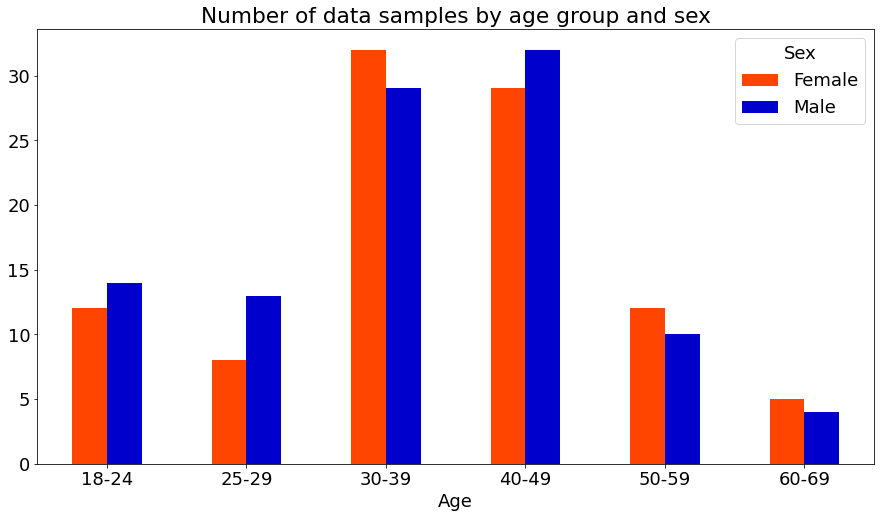

In [ ]:
plt.rcParams.update({'font.size': 18})
pd.crosstab(df['Age'],df['Sex']).plot.bar(figsize=(15,8), title='Number of data samples by age group and sex', 
                                             fontsize=18, rot=0, color=('orangered','mediumblue'));

In [ ]:
frst_df = df.iloc[ 0:50, : ]
scnd_df = df.iloc[ 50:100, :]
thrd_df = df.iloc[ 100:150, :]
frth_df = df.iloc[ 150:200, :]

In [ ]:
#count occurrences of each gender and age for each question subset in the dataset
for i in (frst_df, scnd_df, thrd_df, frth_df):
  print(i.groupby(['Sex', 'Age']).size())
  print('-------------------')

Sex     Age  
Female  18-24     1
        25-29     3
        30-39     9
        40-49     7
        50-59     4
        60-69     2
Male    25-29     2
        30-39    11
        40-49     8
        50-59     3
dtype: int64
-------------------
Sex     Age  
Female  18-24    1
        25-29    3
        30-39    7
        40-49    6
        50-59    1
        60-69    3
Male    18-24    3
        25-29    6
        30-39    9
        40-49    8
        50-59    3
dtype: int64
-------------------
Sex     Age  
Female  18-24    2
        25-29    2
        30-39    9
        40-49    9
        50-59    3
Male    18-24    5
        25-29    5
        30-39    3
        40-49    8
        50-59    1
        60-69    3
dtype: int64
-------------------
Sex     Age  
Female  18-24    8
        30-39    7
        40-49    7
        50-59    4
Male    18-24    6
        30-39    6
        40-49    8
        50-59    3
        60-69    1
dtype: int64
-------------------


In [ ]:
#create sub-dataframes for each 'persona'

#for first part:
younger_male_df_1 = frst_df.loc[(frst_df['Age'].isin(['18-24', '25-29', '30-39'])) & (frst_df['Sex'] == 'Male')].reset_index() 
younger_female_df_1 = frst_df.loc[(frst_df['Age'].isin(['18-24', '25-29', '30-39'])) & (frst_df['Sex'] == 'Female')].reset_index() 
older_male_df_1 = frst_df.loc[(frst_df['Age'].isin(['40-49', '50-59', '60-69'])) & (frst_df['Sex'] == 'Male')].reset_index() 
older_female_df_1 = frst_df.loc[(frst_df['Age'].isin(['40-49', '50-59', '60-69'])) & (frst_df['Sex'] == 'Female')].reset_index() 

#for second part:
younger_male_df_2 = scnd_df.loc[(scnd_df['Age'].isin(['18-24', '25-29', '30-39'])) & (scnd_df['Sex'] == 'Male')].reset_index() 
younger_female_df_2 = scnd_df.loc[(scnd_df['Age'].isin(['18-24', '25-29', '30-39'])) & (scnd_df['Sex'] == 'Female')].reset_index() 
older_male_df_2 = scnd_df.loc[(scnd_df['Age'].isin(['40-49', '50-59', '60-69'])) & (scnd_df['Sex'] == 'Male')].reset_index() 
older_female_df_2 = scnd_df.loc[(scnd_df['Age'].isin(['40-49', '50-59', '60-69'])) & (scnd_df['Sex'] == 'Female')].reset_index() 

#for third part:
younger_male_df_3 = thrd_df.loc[(thrd_df['Age'].isin(['18-24', '25-29', '30-39'])) & (thrd_df['Sex'] == 'Male')].reset_index() 
younger_female_df_3 = thrd_df.loc[(thrd_df['Age'].isin(['18-24', '25-29', '30-39'])) & (thrd_df['Sex'] == 'Female')].reset_index() 
older_male_df_3 = thrd_df.loc[(thrd_df['Age'].isin(['40-49', '50-59', '60-69'])) & (thrd_df['Sex'] == 'Male')].reset_index() 
older_female_df_3 = thrd_df.loc[(thrd_df['Age'].isin(['40-49', '50-59', '60-69'])) & (thrd_df['Sex'] == 'Female')].reset_index() 

#for fourth part:
younger_male_df_4 = frth_df.loc[(frth_df['Age'].isin(['18-24', '25-29', '30-39'])) & (frth_df['Sex'] == 'Male')].reset_index() 
younger_female_df_4 = frth_df.loc[(frth_df['Age'].isin(['18-24', '25-29', '30-39'])) & (frth_df['Sex'] == 'Female')].reset_index() 
older_male_df_4 = frth_df.loc[(frth_df['Age'].isin(['40-49', '50-59', '60-69'])) & (frth_df['Sex'] == 'Male')].reset_index() 
older_female_df_4 = frth_df.loc[(frth_df['Age'].isin(['40-49', '50-59', '60-69'])) & (frth_df['Sex'] == 'Female')].reset_index() 

In [ ]:
#check number of entries for each persona
for i in [younger_male_df_1, younger_female_df_1, older_male_df_1, older_female_df_1, 
          younger_male_df_2, younger_female_df_2, older_male_df_2, older_female_df_2,
          younger_male_df_3, younger_female_df_3, older_male_df_3, older_female_df_3,
          younger_male_df_4, younger_female_df_4, older_male_df_4, older_female_df_4]:
  print(len(i))
  print('--')
  

13
--
13
--
11
--
13
--
18
--
11
--
11
--
10
--
13
--
13
--
12
--
12
--
12
--
15
--
12
--
11
--


In [ ]:
#print a cell
younger_male_df_1.iloc[0]['Sad - Patient response 1']

'I am feeling a bit down'

###Count number of question rewritings in the dataset, for all questions

In [ ]:
base_questions = ["Was this caused by a specific event/s?", "Was this caused by a recent or distant event (or events)?", 
                  "Have you recently attempted protocol 6 and found this reignited unmanageable emotions as a result of old events?",
                  "Have you recently attempted protocol 11 and found this reignited unmanageable emotions as a result of old events?",
                  "Thank you. Now I will ask some questions to understand your situation.", "Have you strongly felt or expressed any of the following emotions towards someone:",
                  "Do you believe that you should be the saviour of someone else?", "Do you see yourself as the victim, blaming someone else for how negative you feel?",
                  "Do you feel that you are trying to control someone?", "Are you always blaming and accusing yourself for when something goes wrong?",
                  "In previous conversations, have you considered other viewpoints presented?", 
                  "Are you undergoing a personal crisis (experiencing difficulties with loved ones e.g. falling out with friends)?",
                  "That's Good! Let me recommend a protocol you can attempt.", "From what you have said I believe you are feeling <EMOTION>. Is this correct?",
                  "I am sorry. Please select from the emotions below the one that best reflects what you are feeling:", "Thank you for taking part. See you soon",
                  "Here are my recommendations, please select the protocol that you would like to attempt", 
                  "Please try to go through this protocol now. When you finish, press 'continue'", "Do you feel better or worse after having taken this protocol?", 
                  "Would you like to attempt another protocol? (Patient feels better)", "Would you like to attempt another protocol? (Patient feels worse)"]

In [ ]:
question_cols = []
for q in base_questions:
   question = [col for col in df.columns if q in col]
   question_cols.append(question)

In [ ]:
#print number of non-NaN entries in each question column
for q in base_questions:
   question = [col for col in df.columns if q in col]
   count = df[question].count()
   print(count)

Sad - Was this caused by a specific event/s?        50
Angry - Was this caused by a specific event/s?      44
Anxious - Was this caused by a specific event/s?    49
dtype: int64
Sad - Was this caused by a recent or distant event (or events)?        47
Angry - Was this caused by a recent or distant event (or events)?      44
Anxious - Was this caused by a recent or distant event (or events)?    50
dtype: int64
Sad - Have you recently attempted protocol 6 and found this reignited unmanageable emotions as a result of old events?        48
Angry - Have you recently attempted protocol 6 and found this reignited unmanageable emotions as a result of old events?      42
Anxious - Have you recently attempted protocol 6 and found this reignited unmanageable emotions as a result of old events?    49
dtype: int64
Sad - Have you recently attempted protocol 11 and found this reignited unmanageable emotions as a result of old events?        48
Angry - Have you recently attempted protocol 11 and found

In [ ]:
#calculate total of all rewritten questions in the dataset (as well as the number of base questions)
tot_count = 0 #count the number of total rewritten questions (disregarding missing data)
tot_base_questions = 0 #count the number of base questions
for i in question_cols:
  for j in i:
    count = df[j].count()
    tot_count += count
    tot_base_questions += 1

print(tot_count)
print(tot_base_questions)

2093
44


###Count number of sentences collected from all the utterances in a column for each persona

In [40]:
df = pd.read_csv('drive/MyDrive/empatheticPersonas.csv')

In [41]:
#create dataframes for each persona
younger_male_df = df.loc[(df['Age'].isin(['18-24', '25-29', '30-39'])) & (df['Sex'] == 'Male')].reset_index() 
younger_female_df = df.loc[(df['Age'].isin(['18-24', '25-29', '30-39'])) & (df['Sex'] == 'Female')].reset_index() 
older_male_df = df.loc[(df['Age'].isin(['40-49', '50-59', '60-69'])) & (df['Sex'] == 'Male')].reset_index() 
older_female_df = df.loc[(df['Age'].isin(['40-49', '50-59', '60-69'])) & (df['Sex'] == 'Female')].reset_index() 

In [42]:
#drop unnecessary columns from the personas dataframes
df.drop(['Sex', 'Age', 'Sad - Patient response 1', 'Sad - Patient response 2', 'Sad - Patient response 3', 
          'Angry - Patient response 1', 'Angry - Patient response 2', 'Angry - Patient response 3', 
          'Anxious - Patient response 1', 'Anxious - Patient response 2', 'Anxious - Patient response 3', 
          'Happy - Patient response 1', 'Happy - Patient response 2', 'Happy - Patient response 3'], axis=1, inplace=True)
for i in [younger_male_df, younger_female_df, older_male_df, older_female_df]:
  i.drop(['index', 'Sex', 'Age', 'Sad - Patient response 1', 'Sad - Patient response 2', 'Sad - Patient response 3', 
          'Angry - Patient response 1', 'Angry - Patient response 2', 'Angry - Patient response 3', 
          'Anxious - Patient response 1', 'Anxious - Patient response 2', 'Anxious - Patient response 3', 
          'Happy - Patient response 1', 'Happy - Patient response 2', 'Happy - Patient response 3'], axis=1, inplace=True)

In [32]:
#make individual augmented utterance datasets
#and count how many self-contained sentences in corpus for each persona and each column

counter=0
all_counts=[]

for i in [df, younger_male_df, younger_female_df, older_male_df, older_female_df]:
  aug_df = pd.DataFrame()
  col_index = 0
  for column in i:
    #initialise list for all augmented sentences
    all_sentences = []

    #create list to hold part of sentences
    first_sentence = []
    second_sentence = []
    third_sentence = []

    #split each sentence in column at full stop, exclamation point or question mark
    for j in i[column]:
      #attempt split only if entry is not NaN
      if pd.notna(j):
        #temp_list = re.split(r'(?<=\w\[.])\s', i)
        temp_list = re.split('(?<=[.?!]) +', j)
        temp_list[0] = temp_list[0] + ' '
        if len(temp_list) > 1:
          temp_list[1] = temp_list[1] + ' '
        #if we found three sentences, put them in the relevant list
        if len(temp_list) == 3:
          first_sentence.append(temp_list[0])
          second_sentence.append(temp_list[1])
          third_sentence.append(temp_list[2])
        #if we found two sentences we check whether the first is a question
        #to determine where to assign them
        elif len(temp_list) == 2:
          if '?' in temp_list[0]:
            second_sentence.append(temp_list[0])
            third_sentence.append(temp_list[1])
          else:
            first_sentence.append(temp_list[0])
            second_sentence.append(temp_list[1])
        #if only one sentece was found, put it in the second list
        else:
          second_sentence.append(temp_list[0])

    #convert to set and back to list to eliminate any duplicate sentences
    first_sentence_set = set(first_sentence)
    first_sentence = list(first_sentence_set)
    second_sentence_set = set(second_sentence)
    second_sentence = list(second_sentence_set)
    third_sentence_set = set(third_sentence)
    third_sentence = list(third_sentence_set)


    all_counts.append(len(first_sentence) + len(second_sentence) + len(third_sentence))


    #finally, append empty string to first_sentence and third_sentence list, since some questions do not have a first or 3rd sentence
    first_sentence.append('')
    third_sentence.append('')
  
    for k in first_sentence:
      for l in second_sentence:
        for m in third_sentence:
          compstring = k + l + m
          all_sentences.append(compstring)
  
    newdf = pd.DataFrame({col_index: all_sentences})
    aug_df = pd.concat([aug_df, newdf], ignore_index=True, axis=1)
    col_index += 1


  filename = 'drive/MyDrive/df'+ str(counter) + '.csv'
  aug_df.to_csv(filename, index=False)  
  counter += 1
 
print(all_counts[:45])
print(all_counts[45:90])
print(all_counts[90:135])
print(all_counts[135:180])
print(all_counts[180:])

[69, 67, 64, 64, 94, 64, 54, 61, 58, 57, 54, 58, 67, 61, 55, 55, 84, 57, 52, 57, 56, 55, 52, 53, 88, 79, 77, 76, 99, 76, 70, 69, 70, 65, 63, 70, 91, 76, 97, 94, 98, 96, 76, 85, 87]
[19, 17, 19, 19, 25, 15, 18, 21, 18, 19, 17, 21, 18, 16, 16, 16, 26, 17, 18, 21, 18, 19, 17, 20, 25, 21, 20, 20, 25, 18, 17, 19, 17, 16, 16, 17, 23, 18, 24, 22, 26, 26, 21, 25, 24]
[20, 19, 15, 15, 26, 17, 13, 13, 13, 13, 13, 12, 17, 17, 15, 15, 20, 14, 11, 14, 13, 12, 11, 12, 24, 23, 22, 21, 26, 22, 21, 20, 22, 20, 18, 20, 27, 24, 28, 30, 24, 25, 17, 24, 23]
[16, 18, 13, 13, 21, 16, 12, 14, 13, 13, 13, 12, 16, 11, 9, 9, 17, 10, 13, 12, 15, 13, 13, 11, 22, 16, 17, 17, 24, 19, 16, 14, 14, 15, 15, 17, 24, 20, 24, 22, 24, 21, 19, 23, 24]
[16, 16, 17, 17, 25, 16, 11, 15, 14, 12, 11, 14, 16, 17, 15, 15, 24, 16, 10, 10, 10, 11, 11, 10, 18, 19, 18, 18, 25, 17, 18, 16, 17, 15, 14, 16, 21, 17, 22, 22, 24, 24, 19, 21, 22]


In [57]:
#count utterances in whole dataset before and after augmentation (Kai persona)
aug_df_kai = pd.read_csv('drive/MyDrive/df0.csv')

count=0
for i, row in df.iterrows():
  for j in row:
    if pd.notna(j):
      count += 1

aug_count=0
for i, row in aug_df_kai.iterrows():
  for j in row:
    if pd.notna(j):
      aug_count += 1

print(count)
print(aug_count)

2143
94993


In [58]:
#Arman persona

aug_df_arman = pd.read_csv('drive/MyDrive/df1.csv')

count=0
for i, row in younger_male_df.iterrows():
  for j in row:
    if pd.notna(j):
      count += 1

aug_count=0
for i, row in aug_df_arman.iterrows():
  for j in row:
    if pd.notna(j):
      aug_count += 1

print(count)
print(aug_count)

614
4747


In [59]:
#Olivia

aug_df_olivia = pd.read_csv('drive/MyDrive/df2.csv')

count=0
for i, row in younger_female_df.iterrows():
  for j in row:
    if pd.notna(j):
      count += 1

aug_count=0
for i, row in aug_df_olivia.iterrows():
  for j in row:
    if pd.notna(j):
      aug_count += 1

print(count)
print(aug_count)

554
5172


In [60]:
#Robert

aug_df_robert = pd.read_csv('drive/MyDrive/df3.csv')

count=0
for i, row in older_male_df.iterrows():
  for j in row:
    if pd.notna(j):
      count += 1

aug_count=0
for i, row in aug_df_robert.iterrows():
  for j in row:
    if pd.notna(j):
      aug_count += 1

print(count)
print(aug_count)

480
3980


In [61]:
#Gabrielle

aug_df_gabrielle = pd.read_csv('drive/MyDrive/df4.csv')

count=0
for i, row in older_female_df.iterrows():
  for j in row:
    if pd.notna(j):
      count += 1

aug_count=0
for i, row in aug_df_gabrielle.iterrows():
  for j in row:
    if pd.notna(j):
      aug_count += 1

print(count)
print(aug_count)

495
4123


##Analysis of the empathy annotated portion of the dataset

In [ ]:
emp_labels = pd.read_csv('drive/MyDrive/empathy_labelled_ds.csv')

In [ ]:
emp_labels.head()

,response,annotator1_score,annotator2_score,annotator3_score,empathy_score
0,"When you've selected the protocol you want to try, please begin the protocol. When you have finished, you may press 'continue' to carry on.",1,2,2,2
1,Did something happen to you?,0,0,1,0
2,"Thank you for taking part, I really appreciate it and your efforts are very valuable. Have a good day!",2,1,2,2
3,I am grateful for your participation. I hope to work with you again soon.,1,2,2,2
4,"Thank you for being so open, I'm trying to determine the best way to help and know how hard it is to revisit trauma. I would like to know if Protocol 6 proved too painful for you?",2,2,2,2


In [ ]:
len(emp_labels)

1100

In [ ]:
#check how many sentences each utterance contains
n_sent_list = []
score_list = []
for index, row in emp_labels.iterrows():
  count=0
  for char in row['response']:
    if char == '.' or char == '?' or char == '!' or char == ':':
      count += 1
  n_sent_list.append(count)
  score_list.append(row['empathy_score'])
new_df = pd.DataFrame({'number of sentences': n_sent_list, 'empathy score': score_list})
  

In [ ]:
new_df.head()

,number of sentences,empathy score
0,2,2
1,1,0
2,2,2
3,2,2
4,2,2


In [ ]:
new_df.groupby('number of sentences').count()

,empathy score
number of sentences,
1,623
2,462
3,15


In [ ]:
new_df.rename(columns={'empathy score': 'mean empathy score'}, inplace=True)
new_df.groupby('number of sentences').mean()

,mean empathy score
number of sentences,
1,0.568218
2,1.662338
3,1.866667


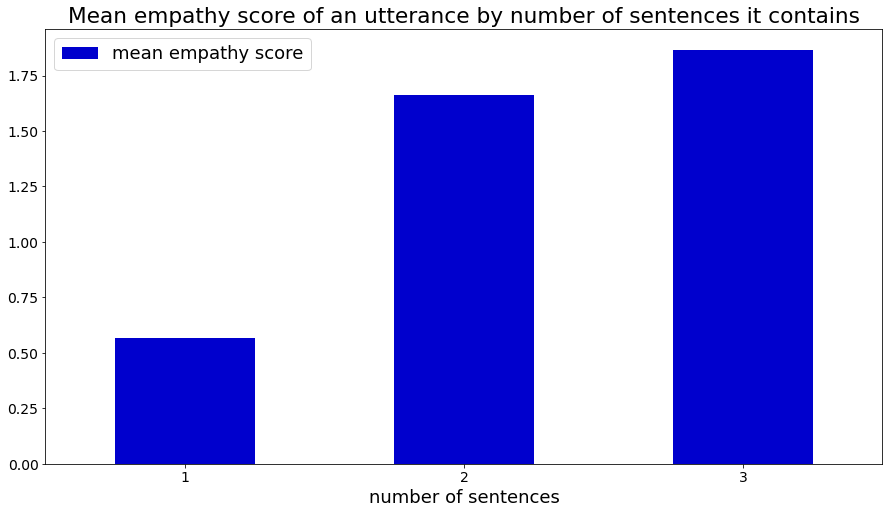

In [ ]:
plt.rcParams.update({'font.size': 18})
new_df.groupby('number of sentences').mean().plot.bar(figsize=(15,8), title='Mean empathy score of an utterance by number of sentences it contains', 
                                             fontsize=14, rot=0, color=('mediumblue'), legend='ciao'); 